# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
websites.shape

(1781, 21)

In [5]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [6]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [7]:
websites["SERVER"].unique

<bound method Series.unique of 0                        nginx
1                Apache/2.4.10
2        Microsoft-HTTPAPI/2.0
3                        nginx
4                         None
                 ...          
1776                    Apache
1777                    Apache
1778    Apache/2.2.16 (Debian)
1779          cloudflare-nginx
1780         Microsoft-IIS/8.5
Name: SERVER, Length: 1781, dtype: object>

In [8]:
nulls=pd.DataFrame(websites.isnull().sum())
nulls["ratio"]=nulls[0]/nulls.shape[0]
nulls

,0,ratio
URL,0,0.000000
URL_LENGTH,0,0.000000
NUMBER_SPECIAL_CHARACTERS,0,0.000000
CHARSET,0,0.000000
SERVER,1,0.047619
CONTENT_LENGTH,812,38.666667
WHOIS_COUNTRY,0,0.000000
WHOIS_STATEPRO,0,0.000000
WHOIS_REGDATE,0,0.000000
WHOIS_UPDATED_DATE,0,0.000000


In [9]:
# Your comment here

#What the dataset looks like?
    #dataset shape (1781, 21)   

#What are the data types?
    #int ,floats and objects

#Which columns contain the features of the websites?
    #All collumns except column type

#Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
    #Column type

#Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
    #All the object column need to be transformed to categorical or dropped
    
#I will drop the content lenght

In [10]:
websites.drop(columns="CONTENT_LENGTH",inplace=True)

In [11]:
nulls=pd.DataFrame(websites.isnull().sum())
nulls["ratio"]=nulls[0]/nulls.shape[0]
nulls

,0,ratio
URL,0,0.00
URL_LENGTH,0,0.00
NUMBER_SPECIAL_CHARACTERS,0,0.00
CHARSET,0,0.00
SERVER,1,0.05
WHOIS_COUNTRY,0,0.00
WHOIS_STATEPRO,0,0.00
WHOIS_REGDATE,0,0.00
WHOIS_UPDATED_DATE,0,0.00
TCP_CONVERSATION_EXCHANGE,0,0.00


#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

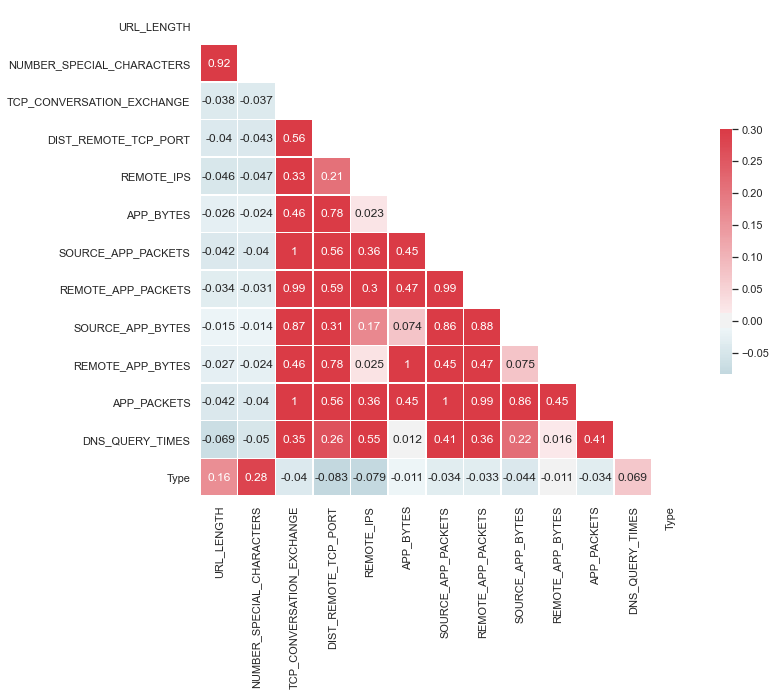

In [12]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def heatmap_f(dataframe):
    import seaborn as sns
    import matplotlib.pyplot as plt
    corr = dataframe.corr()

    sns.set(style="white")

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
    return plt.show()

heatmap_f(websites)

In [13]:
# Your comment here

#High correlation 'TCP_CONVERSATION_EXCHANGE', 'APP_BYTES','SOURCE_APP_PACKETS'
#and 'URL_LENGTH' is also high so althought i'm in doubts I believe I will also drop it


# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

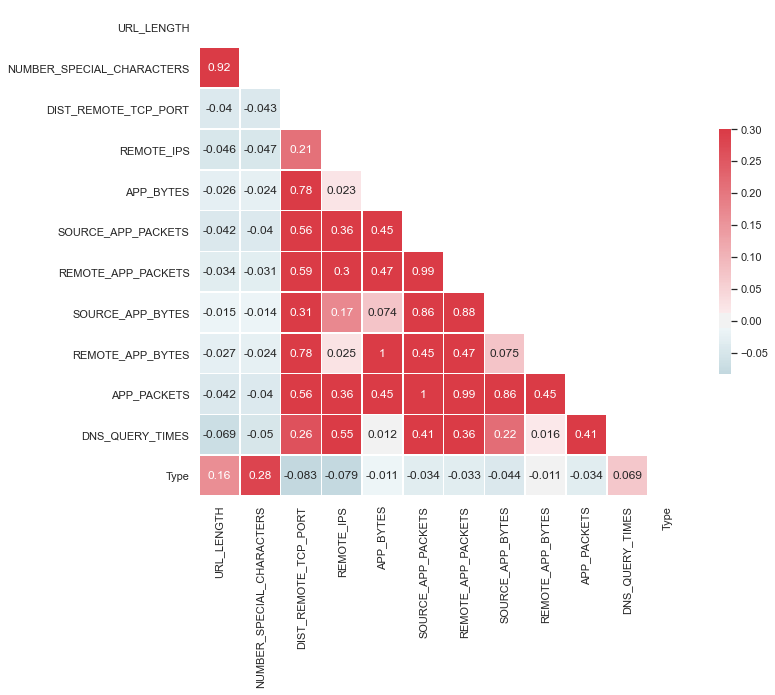

In [14]:
# Your code here
websites_Nocol=websites.copy()

websites_Nocol.drop(columns="TCP_CONVERSATION_EXCHANGE",inplace=True)

heatmap_f(websites_Nocol)

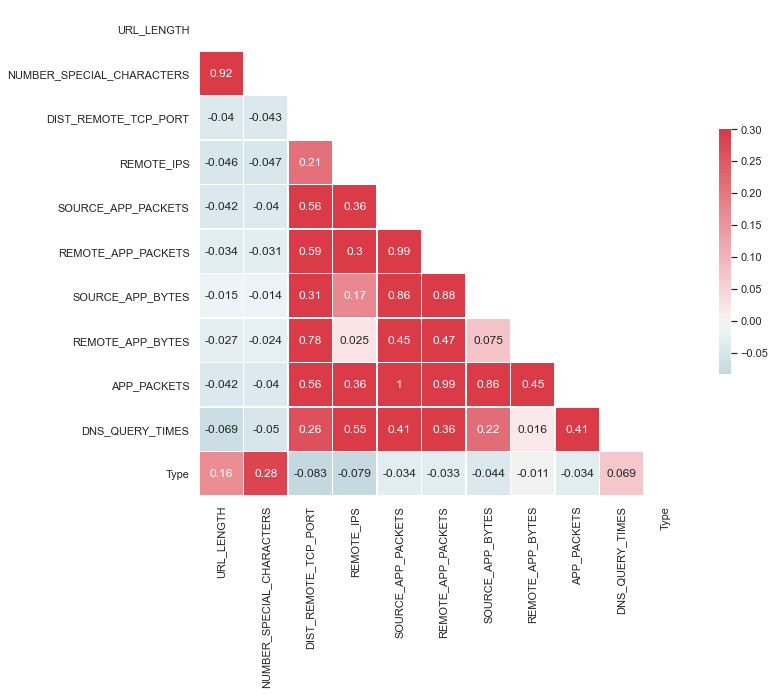

In [15]:
websites_Nocol.drop(columns="APP_BYTES",inplace=True)

heatmap_f(websites_Nocol)

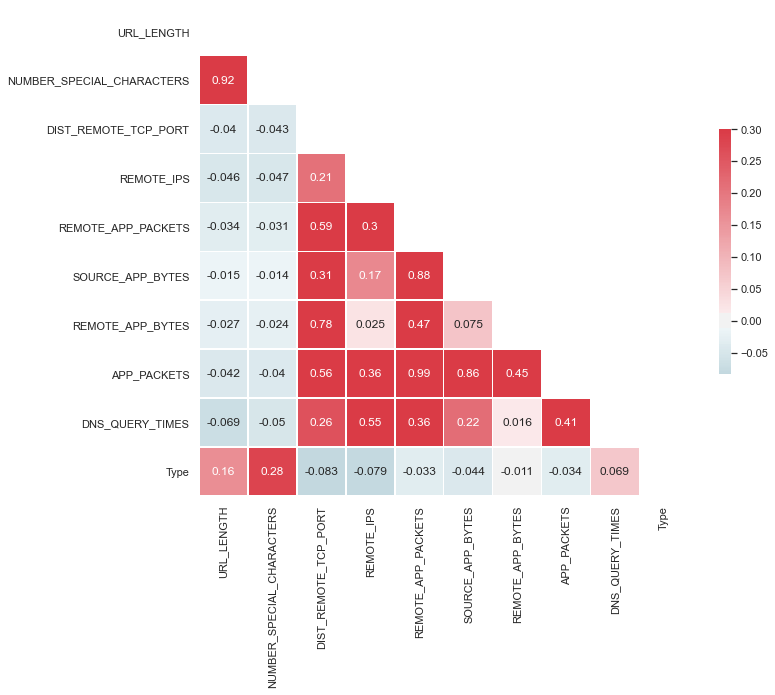

In [16]:
websites_Nocol.drop(columns="SOURCE_APP_PACKETS",inplace=True)

heatmap_f(websites_Nocol)

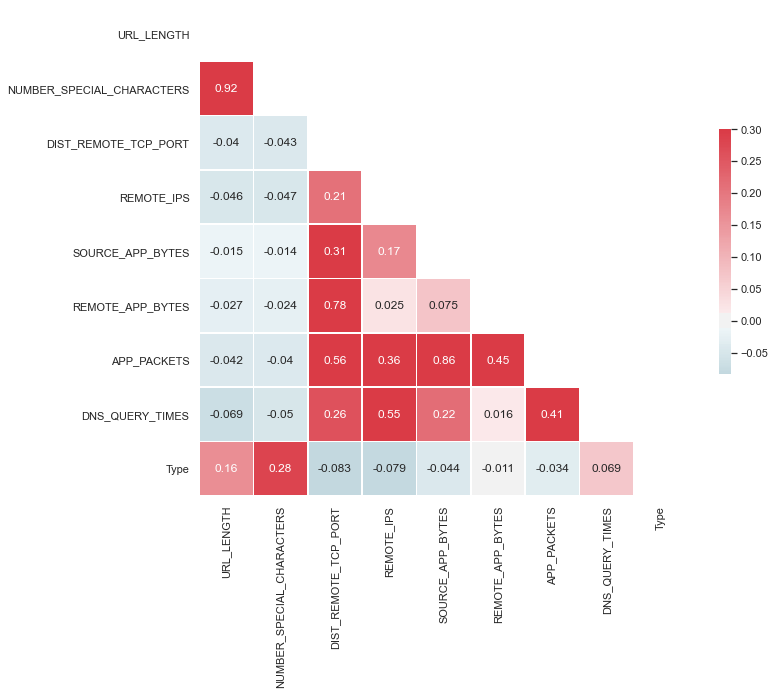

In [17]:
websites_Nocol.drop(columns="REMOTE_APP_PACKETS",inplace=True)

heatmap_f(websites_Nocol)

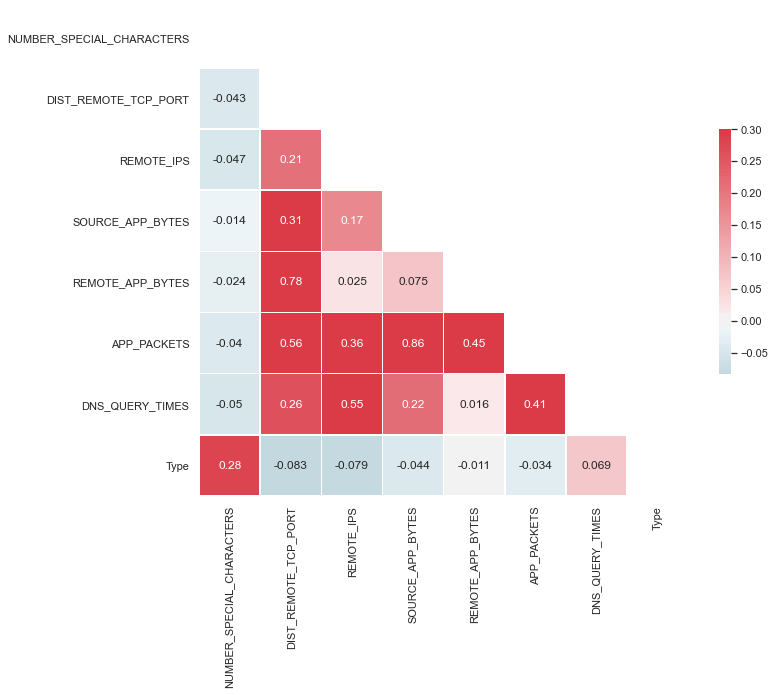

In [18]:
websites_Nocol.drop(columns="URL_LENGTH",inplace=True)

heatmap_f(websites_Nocol)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [19]:
# Your code here
nulls=pd.DataFrame(websites_Nocol.isnull().sum())
nulls["ratio"]=nulls[0]/nulls.shape[0]
nulls

,0,ratio
URL,0,0.000000
NUMBER_SPECIAL_CHARACTERS,0,0.000000
CHARSET,0,0.000000
SERVER,1,0.066667
WHOIS_COUNTRY,0,0.000000
WHOIS_STATEPRO,0,0.000000
WHOIS_REGDATE,0,0.000000
WHOIS_UPDATED_DATE,0,0.000000
DIST_REMOTE_TCP_PORT,0,0.000000
REMOTE_IPS,0,0.000000


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [20]:
# Your code here
websites_Nocol.dropna(inplace=True)

In [21]:
# Your comment here
#All good. I already have dropped before the CONTENT_LENGTH

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [22]:
# Examine missing values in each column
#Proceeding

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [23]:
# Your code here
websites_Nocol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1779 non-null   object 
 1   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 2   CHARSET                    1779 non-null   object 
 3   SERVER                     1779 non-null   object 
 4   WHOIS_COUNTRY              1779 non-null   object 
 5   WHOIS_STATEPRO             1779 non-null   object 
 6   WHOIS_REGDATE              1779 non-null   object 
 7   WHOIS_UPDATED_DATE         1779 non-null   object 
 8   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 9   REMOTE_IPS                 1779 non-null   int64  
 10  SOURCE_APP_BYTES           1779 non-null   int64  
 11  REMOTE_APP_BYTES           1779 non-null   int64  
 12  APP_PACKETS                1779 non-null   int64  
 13  DNS_QUERY_TIMES            1779 non-null   float

In [24]:
websites_Nocol["WHOIS_COUNTRY"].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [25]:
dic = {"[U'GB'; U'UK']": "UK", "UNITED KINGDOM" : "UK", "GB": "UK", "CYPRUS": "CY"}

websites_Nocol["WHOIS_COUNTRY"]=websites_Nocol["WHOIS_COUNTRY"].apply(lambda x: x.upper()).replace(dic)

In [26]:
websites_Nocol["WHOIS_COUNTRY"].unique()

array(['NONE', 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ',
       'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [27]:
websites_Nocol["WHOIS_COUNTRY"].value_counts()

US      1105
NONE     306
CA        83
ES        63
AU        35
UK        35
PA        21
JP        11
IN        10
CN        10
FR         9
CZ         9
NL         6
RU         6
CH         6
KR         5
PH         4
SE         4
AT         4
BS         4
BE         3
DE         3
TR         3
SC         3
HK         3
KY         3
KG         2
BR         2
CY         2
UA         2
NO         2
UY         2
IL         2
SI         2
LV         1
BY         1
IE         1
IT         1
LU         1
UG         1
AE         1
TH         1
PK         1
Name: WHOIS_COUNTRY, dtype: int64

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

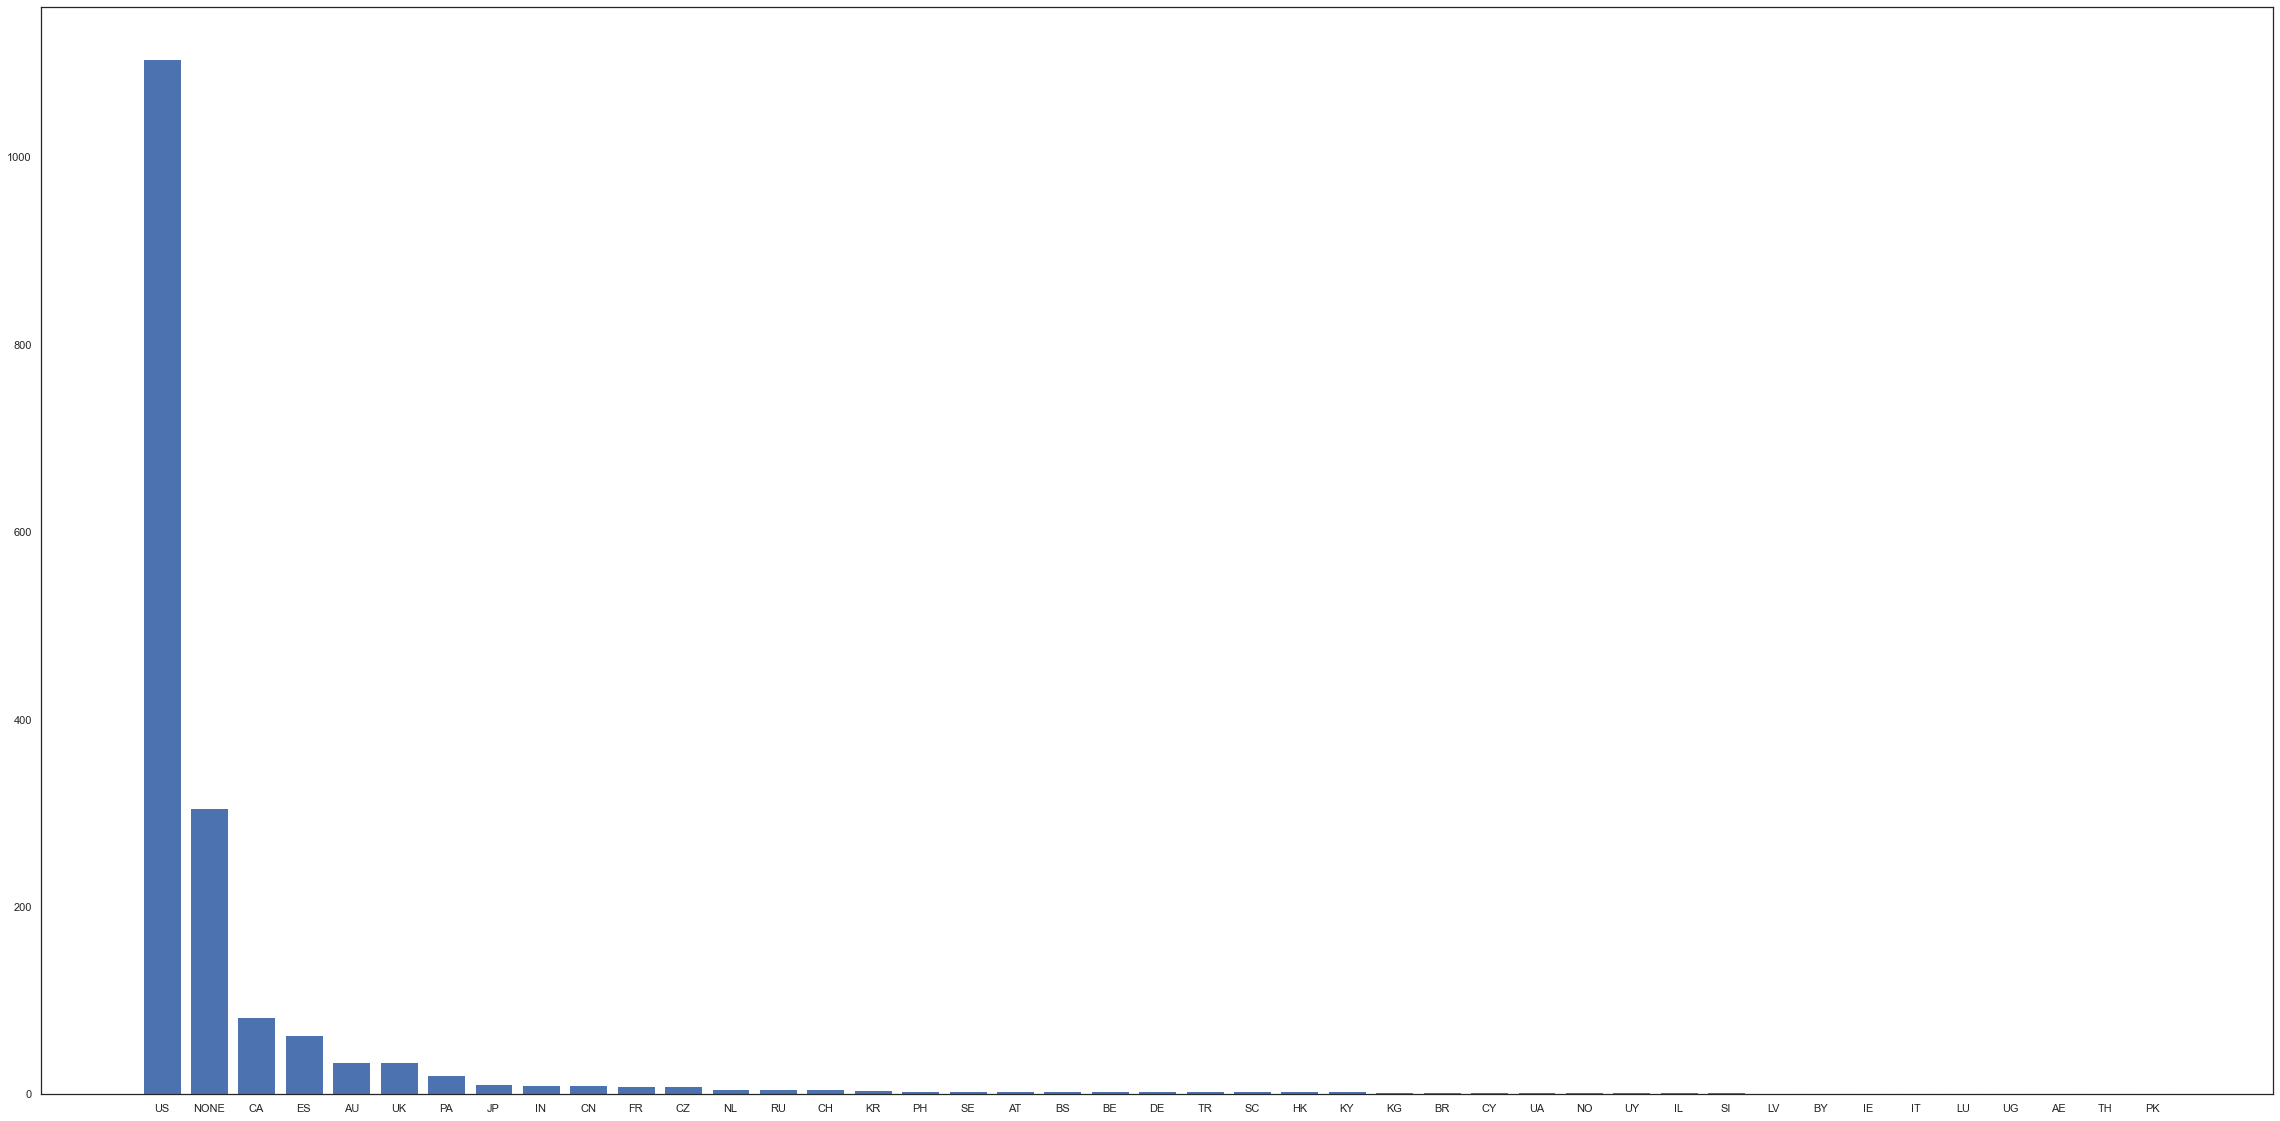

In [28]:
# Your code here
plt.figure(figsize=(40,20))
plt.bar(websites_Nocol["WHOIS_COUNTRY"].value_counts().index,websites_Nocol["WHOIS_COUNTRY"].value_counts())
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [29]:
# Your code here
keep=list(websites_Nocol["WHOIS_COUNTRY"].value_counts()[0:10].index)

websites_Nocol["WHOIS_COUNTRY"]=websites_Nocol["WHOIS_COUNTRY"].apply(lambda x: x if x in keep else "OTHER")

In [30]:
websites_Nocol["WHOIS_COUNTRY"].value_counts()

US       1105
NONE      306
OTHER     100
CA         83
ES         63
AU         35
UK         35
PA         21
JP         11
CN         10
IN         10
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [31]:
# Your code here
websites_Nocol.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)

In [32]:
websites_Nocol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1779 non-null   object 
 1   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 2   CHARSET                    1779 non-null   object 
 3   SERVER                     1779 non-null   object 
 4   WHOIS_COUNTRY              1779 non-null   object 
 5   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 6   REMOTE_IPS                 1779 non-null   int64  
 7   SOURCE_APP_BYTES           1779 non-null   int64  
 8   REMOTE_APP_BYTES           1779 non-null   int64  
 9   APP_PACKETS                1779 non-null   int64  
 10  DNS_QUERY_TIMES            1779 non-null   float64
 11  Type                       1779 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 180.7+ KB


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [33]:
# Your code here
websites_Nocol.dtypes

URL                           object
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [34]:
# Your code here
websites_Nocol.drop(columns=['URL'], inplace=True)

In [35]:
websites_Nocol.dtypes

NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [36]:
# Your code here
websites_Nocol["CHARSET"].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [37]:
# Your code here
websites_Nocol["SERVER"].unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

![Think Hard](../images/think-hard.jpg)

In [38]:
# Your comment here


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [39]:
# Your code here

def serverme(x):
    if "MICROSOFT" in str(x.upper()):
        ans="Microsoft"
    elif "APACHE" in str(x.upper()):
        ans="Apache"
    elif "NGINX" in str(x.upper()):
        ans="nginx"
    else:
        ans="Other"
    return ans
websites_Nocol["SERVER"]=websites_Nocol["SERVER"].astype("str").apply(serverme)


In [40]:
# Count `SERVER` value counts here
websites_Nocol["SERVER"].unique()

array(['nginx', 'Apache', 'Microsoft', 'Other'], dtype=object)

In [41]:
websites_Nocol.dtypes

NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [42]:
# Your code here
from sklearn.preprocessing import StandardScaler

websites_Nocol["CHARSET"]=websites_Nocol["CHARSET"].apply(lambda x: x.upper())

website_dummy=pd.get_dummies(websites_Nocol,drop_first=True)

website_dummy

,NUMBER_SPECIAL_CHARACTERS,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_ISO-8859-1,CHARSET_NONE,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_NONE,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,7,0,2,1153,832,9,2.0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,6,7,4,1265,1230,17,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,6,0,0,0,0,0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6,22,3,18784,4380,39,8.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,6,2,5,129889,4586,61,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,16,0,0,186,0,0,0.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1777,17,0,0,124,0,0,0.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1778,34,2,6,132181,6945,87,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1779,34,0,0,0,0,0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


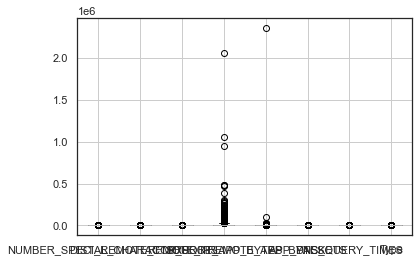

In [43]:
websites_Nocol.boxplot()

#Sklearn preprocessing

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [44]:
# Your code here
website_dummy.dtypes

NUMBER_SPECIAL_CHARACTERS      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_ISO-8859-1             uint8
CHARSET_NONE                   uint8
CHARSET_US-ASCII               uint8
CHARSET_UTF-8                  uint8
CHARSET_WINDOWS-1251           uint8
CHARSET_WINDOWS-1252           uint8
SERVER_Microsoft               uint8
SERVER_Other                   uint8
SERVER_nginx                   uint8
WHOIS_COUNTRY_CA               uint8
WHOIS_COUNTRY_CN               uint8
WHOIS_COUNTRY_ES               uint8
WHOIS_COUNTRY_IN               uint8
WHOIS_COUNTRY_JP               uint8
WHOIS_COUNTRY_NONE             uint8
WHOIS_COUNTRY_OTHER            uint8
WHOIS_COUNTRY_PA               uint8
WHOIS_COUNTRY_UK               uint8
WHOIS_COUNTRY_US               uint8
d

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [45]:
from sklearn.model_selection import train_test_split

X = website_dummy.drop(columns=['Type'],axis=1)
y = website_dummy['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [46]:
#Decided to implement an extra step of standardizing the numerical variables.

X_train2=sc.fit_transform(X_train[['NUMBER_SPECIAL_CHARACTERS', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES']])

scaled_train_df=pd.DataFrame(X_train2,columns=['NUMBER_SPECIAL_CHARACTERS', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES'])

X_scaled_train=pd.concat([scaled_train_df,X_train[['CHARSET_ISO-8859-1', 'CHARSET_NONE',
       'CHARSET_US-ASCII', 'CHARSET_UTF-8', 'CHARSET_WINDOWS-1251',
       'CHARSET_WINDOWS-1252', 'SERVER_Microsoft', 'SERVER_Other',
       'SERVER_nginx', 'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_CN',
       'WHOIS_COUNTRY_ES', 'WHOIS_COUNTRY_IN', 'WHOIS_COUNTRY_JP',
       'WHOIS_COUNTRY_NONE', 'WHOIS_COUNTRY_OTHER', 'WHOIS_COUNTRY_PA',
       'WHOIS_COUNTRY_UK', 'WHOIS_COUNTRY_US']].reset_index(drop=True)],ignore_index=True,axis=1)

X_scaled_train.columns=X_train.columns

In [47]:
X_test2=sc.transform(X_test[['NUMBER_SPECIAL_CHARACTERS', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES']])

scaled_test_df=pd.DataFrame(X_test2,columns=['NUMBER_SPECIAL_CHARACTERS', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES'])

X_scaled_test=pd.concat([scaled_test_df,X_test[['CHARSET_ISO-8859-1', 'CHARSET_NONE',
       'CHARSET_US-ASCII', 'CHARSET_UTF-8', 'CHARSET_WINDOWS-1251',
       'CHARSET_WINDOWS-1252', 'SERVER_Microsoft', 'SERVER_Other',
       'SERVER_nginx', 'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_CN',
       'WHOIS_COUNTRY_ES', 'WHOIS_COUNTRY_IN', 'WHOIS_COUNTRY_JP',
       'WHOIS_COUNTRY_NONE', 'WHOIS_COUNTRY_OTHER', 'WHOIS_COUNTRY_PA',
       'WHOIS_COUNTRY_UK', 'WHOIS_COUNTRY_US']].reset_index(drop=True)],ignore_index=True,axis=1)

X_scaled_test.columns=X_test.columns

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [49]:
# Your code here:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [50]:
# Your code here:

model.fit(X_train,y_train)


LogisticRegression(max_iter=2000)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Your code here:
#predictions: test data
y_pred = model.predict(X_test)

# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('-------------------------------------------------------')

# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(y_pred,y_test))
print('-------------------------------------------------------')

# classification report
print('Classification report')
print(classification_report(y_pred,y_test))


Confusion matrix
[[311  21]
 [  6  18]]
-------------------------------------------------------
Accuracy score
0.9241573033707865
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       332
           1       0.46      0.75      0.57        24

    accuracy                           0.92       356
   macro avg       0.72      0.84      0.76       356
weighted avg       0.95      0.92      0.93       356



In [52]:
#Check the above doing the standardization of the numerical features
model = LogisticRegression(max_iter=2000)
model.fit(X_scaled_train,y_train)

LogisticRegression(max_iter=2000)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Your code here:
#predictions: test data
y_pred = model.predict(X_scaled_test)

# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('-------------------------------------------------------')

# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy Test score')
print(model.score(X_scaled_test,y_test))

print('----------------')
print('Accuracy Train score')
print(model.score(X_scaled_train,y_train))
print('-------------------------------------------------------')

# classification report
print('Classification report')
print(classification_report(y_pred,y_test))

Confusion matrix
[[316  21]
 [  1  18]]
-------------------------------------------------------
Accuracy Test score
0.9382022471910112
----------------
Accuracy Train score
0.9184820801124385
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       337
           1       0.46      0.95      0.62        19

    accuracy                           0.94       356
   macro avg       0.73      0.94      0.79       356
weighted avg       0.97      0.94      0.95       356



What are your thoughts on the performance of the model? Write your conclusions below.

In [55]:
#There was a good improvement when doing the standardization of the numerical variables
#The last results are quite good with a 94% accuracy rate and and 95% of recall which is the really important measure
#for this type of problem. From the 19 malicious websites 18 (95%) were detected.

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [66]:
model = KNeighborsClassifier(n_neighbors = 3)

model.fit(X_scaled_train, y_train)

y_pred = model.predict(X_scaled_test)

# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('-------------------------------------------------------')

# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy Test score')
print(model.score(X_scaled_test,y_test))

print('----------------')
print('Accuracy Train score')
print(model.score(X_scaled_train,y_train))
print('-------------------------------------------------------')

# classification report
print('Classification report')
print(classification_report(y_pred,y_test))


Confusion matrix
[[307   8]
 [ 10  31]]
-------------------------------------------------------
Accuracy Test score
0.949438202247191
----------------
Accuracy Train score
0.9648629655657063
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       315
           1       0.79      0.76      0.77        41

    accuracy                           0.95       356
   macro avg       0.88      0.87      0.87       356
weighted avg       0.95      0.95      0.95       356



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [57]:
# Your code here:

# The results were better with the Logistic regress.
# Here we have higher Accuracy but smaller Recall.

# It is also curious that the Train accuracy is higher than the test score. Overfiting?

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [67]:
model = KNeighborsClassifier(n_neighbors = 5)

model.fit(X_scaled_train, y_train)

y_pred = model.predict(X_scaled_test)

# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('-------------------------------------------------------')

# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy Test score')
print(model.score(X_scaled_test,y_test))

print('----------------')
print('Accuracy Train score')
print(model.score(X_scaled_train,y_train))
print('-------------------------------------------------------')

# classification report
print('Classification report')
print(classification_report(y_pred,y_test))

Confusion matrix
[[309  10]
 [  8  29]]
-------------------------------------------------------
Accuracy Test score
0.949438202247191
----------------
Accuracy Train score
0.9508081517919887
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       319
           1       0.74      0.78      0.76        37

    accuracy                           0.95       356
   macro avg       0.86      0.88      0.87       356
weighted avg       0.95      0.95      0.95       356



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [59]:
# Your conclusions here:

#We had an improvament in the recall result. Same accuracy

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [60]:
# Your code here